
# **ASSIGNMENT 4 (Heart Disease)**
 **BAGUS PANULUH - DS04023**

# CRISP-DM

**Business Understanding**

Dataset heart.csv adalah dataset berisi data pasien dengan beberapa atribut yang nantinya akan menjadi penentu apakah pasien tersebut menderita penyakit jantung atau tidak

---
**Atribut**

*   age: umur (tahun)
*   sex jenis kelamin (1: pria, 0:wanita)
*   cp: jenis nyeri data (ada 4 tipe)
*   trestbps: tekanan darah istirahat(mmHg)
*   chol: kolesterol serum (mg/dl)
*   fbs: gula darah puasa > 120 mg/dl (0:tidak, 1:ya)
*   restecg: hasil elektrokardiografi istirahat (values 0, 1, 2)
*   thalach: maximum detak jantung
*   exang: latihan diinduksi angina (0:tidak ada, 1: ya)
*   oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
*   slope: kemiringan segmen ST latihan puncak
*   ca: jumlah vessel utama (0-3) diwarnai oleh flourosopy
*   thal: 0 = normal; 1 = cacat tetap; 2 = cacat yang dapat dibalik
*   target (0: tidak berpenyakit jantung, 1:berpenyakit jantung)

---
**Tujuan**

*   Mengetahui apa saja atribut yang berpengaruh besar terhadap penyakit jantung
*   Mengklasifikasikan pasien termasuk memiliki penyakit jantung atau tidak berdasarkan beberapa faktor



---






# Get To Know Data

## Library

In [1]:
import pandas as pd
#import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read Data

In [2]:
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Kualitas Data

In [ ]:
# Missing Value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Duplicates
duplicate = df[df.duplicated()]
duplicate.sort_values(by=["age"])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


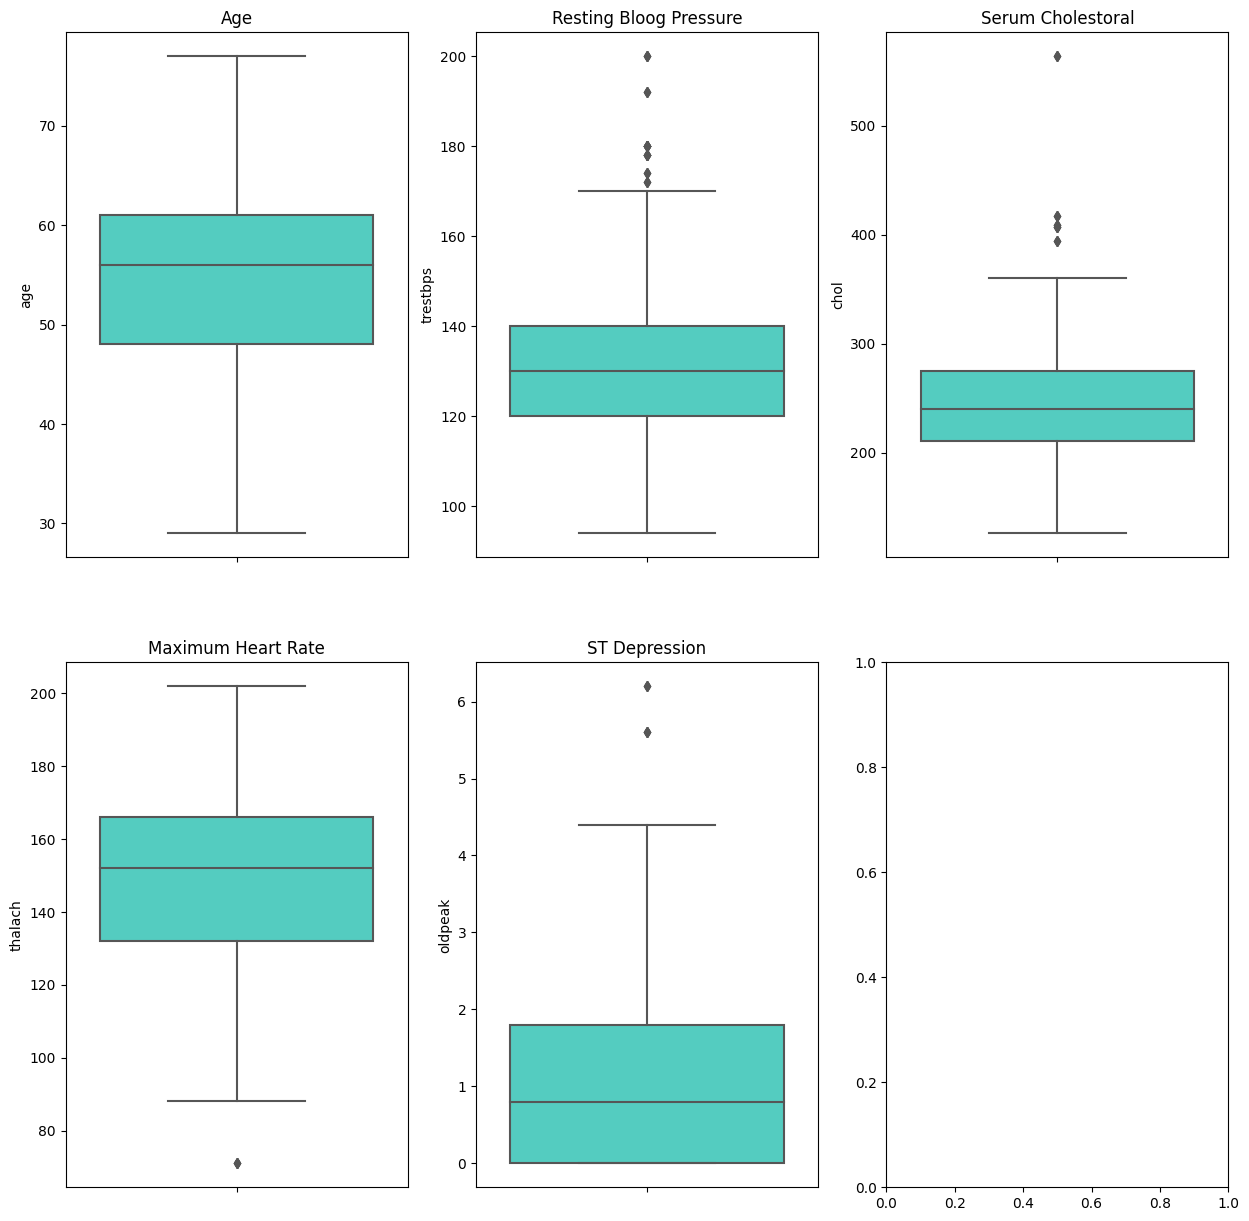

In [ ]:
# Outlier
# Grafik Boxplot untuk Outliers Checking di tiap atribut
fig, axe = plt.subplots(2, 3, figsize=(15, 15))

axe[0, 0].set_title('Age')
box = sns.boxplot(y=df['age'], ax=axe[0, 0], color='turquoise')

axe[0, 1].set_title('Resting Bloog Pressure')
box = sns.boxplot(y=df['trestbps'], ax=axe[0, 1], color='turquoise')

axe[0, 2].set_title('Serum Cholestoral')
box = sns.boxplot(y=df['chol'], ax=axe[0, 2], color='turquoise')

axe[1, 0].set_title('Maximum Heart Rate')
box = sns.boxplot(y=df['thalach'], ax=axe[1, 0], color='turquoise')

axe[1, 1].set_title('ST Depression')
box = sns.boxplot(y=df['oldpeak'], ax=axe[1, 1], color='turquoise')

plt.show()

Outlier yang ditampilkan hanya dari atribut yang sifatnya numerik dan tidak kategorikal. Atribut dengan value yang sudah memiliki range pasti (misal valuenya hanya 0, 1, 2, atau 3) tidak ditampilkan

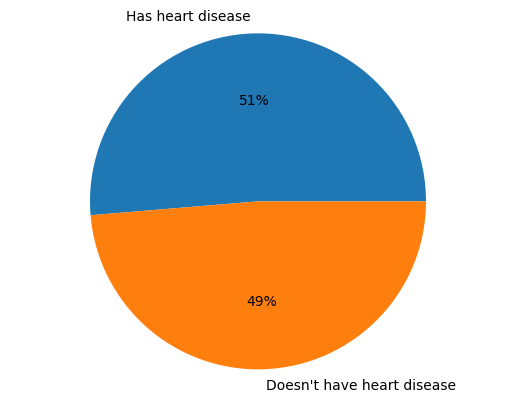

In [ ]:
# Data Imbalance
labels = "Has heart disease", "Doesn't have heart disease"
fig, ax1 = plt.subplots()
ax1.pie(df["target"].value_counts(), labels=labels, autopct='%1.0f%%')
ax1.axis('equal')
plt.show()

# Descriptive Statistic

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


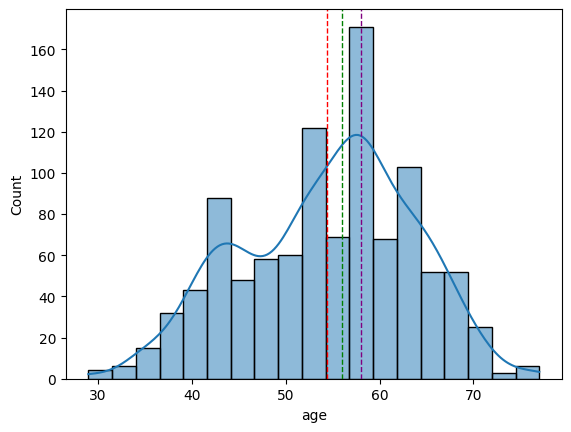

In [ ]:
sns.histplot(df['age'], kde=True)

# Add vertical lines for mean and median
plt.axvline(np.mean(df['age']), color='red', linestyle='dashed', linewidth=1) # Mean
plt.axvline(np.median(df['age']), color='green', linestyle='dashed', linewidth=1) #Median
plt.axvline(statistics.mode(df['age']), color='purple', linestyle='dashed', linewidth=1) #Modus

plt.show()

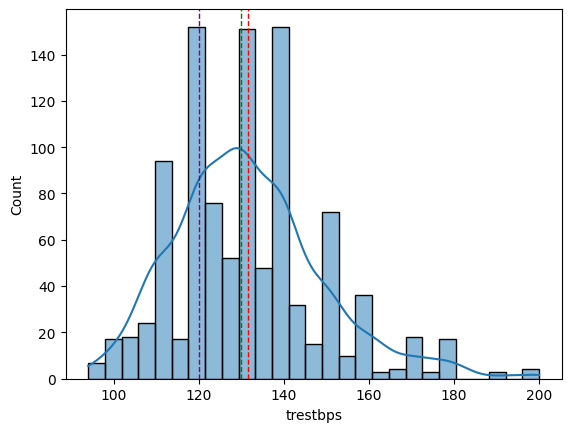

In [ ]:
sns.histplot(df['trestbps'], kde=True)

# Add vertical lines for mean and median
plt.axvline(np.mean(df['trestbps']), color='red', linestyle='dashed', linewidth=1) # Mean
plt.axvline(np.median(df['trestbps']), color='green', linestyle='dashed', linewidth=1) #Median
plt.axvline(statistics.mode(df['trestbps']), color='purple', linestyle='dashed', linewidth=1) #Modus

plt.show()

# Correlation

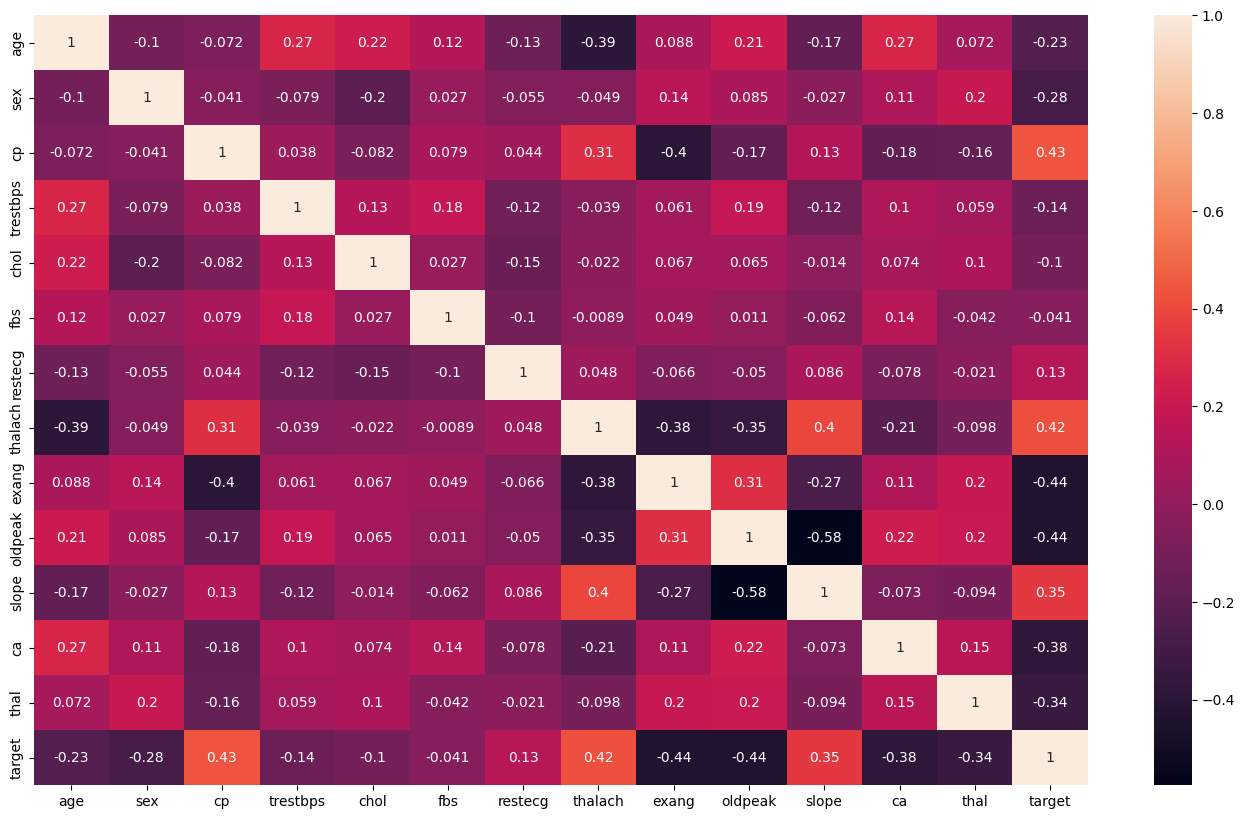

In [ ]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True)

plt.show()

# Feature Engineering

## Encoding

In [ ]:
sex_encode=pd.get_dummies(data=df['sex'],prefix='sex')
sex_encode

,sex_0,sex_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
1020,0,1
1021,0,1
1022,0,1
1023,1,0


In [ ]:
exang_encode=pd.get_dummies(df['exang'],prefix='exang')
exang_encode

,exang_0,exang_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
1020,0,1
1021,0,1
1022,0,1
1023,1,0


In [ ]:
fbs_encode=pd.get_dummies(df['fbs'],prefix='fbs')
fbs_encode

,fbs_0,fbs_1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
1020,1,0
1021,1,0
1022,1,0
1023,1,0


In [ ]:
data=[df, sex_encode, exang_encode, fbs_encode]
data=pd.concat(data, axis = 1)
data.drop(['sex', 'exang','fbs'], axis=1, inplace=True)
data

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target,sex_0,sex_1,exang_0,exang_1,fbs_0,fbs_1
0,52,0,125,212,1,168,1.0,2,2,3,0,0,1,1,0,1,0
1,53,0,140,203,0,155,3.1,0,0,3,0,0,1,0,1,0,1
2,70,0,145,174,1,125,2.6,0,0,3,0,0,1,0,1,1,0
3,61,0,148,203,1,161,0.0,2,1,3,0,0,1,1,0,1,0
4,62,0,138,294,1,106,1.9,1,3,2,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,1,164,0.0,2,0,2,1,0,1,0,1,1,0
1021,60,0,125,258,0,141,2.8,1,1,3,0,0,1,0,1,1,0
1022,47,0,110,275,0,118,1.0,1,1,2,0,0,1,0,1,1,0
1023,50,0,110,254,0,159,0.0,2,0,2,1,1,0,1,0,1,0


## Feature Selection

In [ ]:
x = data.drop('target', axis=1)
y = data['target']
x

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,sex_0,sex_1,exang_0,exang_1,fbs_0,fbs_1
0,52,0,125,212,1,168,1.0,2,2,3,0,1,1,0,1,0
1,53,0,140,203,0,155,3.1,0,0,3,0,1,0,1,0,1
2,70,0,145,174,1,125,2.6,0,0,3,0,1,0,1,1,0
3,61,0,148,203,1,161,0.0,2,1,3,0,1,1,0,1,0
4,62,0,138,294,1,106,1.9,1,3,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,1,164,0.0,2,0,2,0,1,0,1,1,0
1021,60,0,125,258,0,141,2.8,1,1,3,0,1,0,1,1,0
1022,47,0,110,275,0,118,1.0,1,1,2,0,1,0,1,1,0
1023,50,0,110,254,0,159,0.0,2,0,2,1,0,1,0,1,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
# Feature selection with Chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

features_best = []
num_features_max = 15
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score'))

     Feature       Score
5    thalach  650.008493
6    oldpeak  253.653461
1         cp  217.823922
8         ca  210.625919
13   exang_1  130.470927
3       chol  110.723364
0        age   81.425368
12   exang_0   66.194809
10     sex_0   55.700040
2   trestbps   45.974069
7      slope   33.673948
11     sex_1   24.373650
9       thal   19.373465
4    restecg    9.739343
15     fbs_1    1.477550
14     fbs_0    0.259249


In [ ]:
# Drop Fetaure that not strong correlated with target
x.drop(['fbs_0','fbs_1','restecg', 'thal'],axis=1,inplace=True)
x

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,sex_0,sex_1,exang_0,exang_1
0,52,0,125,212,168,1.0,2,2,0,1,1,0
1,53,0,140,203,155,3.1,0,0,0,1,0,1
2,70,0,145,174,125,2.6,0,0,0,1,0,1
3,61,0,148,203,161,0.0,2,1,0,1,1,0
4,62,0,138,294,106,1.9,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,2,0,0,1,0,1
1021,60,0,125,258,141,2.8,1,1,0,1,0,1
1022,47,0,110,275,118,1.0,1,1,0,1,0,1
1023,50,0,110,254,159,0.0,2,0,1,0,1,0


# Modelling

In [ ]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,sex_0,sex_1,exang_0,exang_1
880,57,0,132,207,168,0.0,2,0,0,1,0,1
358,59,3,134,204,162,0.8,2,2,0,1,1,0
772,62,0,150,244,154,1.4,1,0,1,0,0,1
682,59,0,164,176,90,1.0,1,2,0,1,1,0
848,58,3,150,283,162,1.0,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
905,64,0,120,246,96,2.2,0,1,0,1,0,1
767,68,0,144,193,141,3.4,1,2,0,1,1,0
72,56,0,125,249,144,1.2,1,1,0,1,0,1
908,62,0,120,267,99,1.8,1,2,0,1,0,1


## Scaling Data

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Without Hyperparamater Tuning

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       109
           1       0.72      0.91      0.80        96

    accuracy                           0.79       205
   macro avg       0.81      0.80      0.79       205
weighted avg       0.81      0.79      0.79       205



### K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.81      0.86      0.84        96

    accuracy                           0.84       205
   macro avg       0.84      0.85      0.84       205
weighted avg       0.85      0.84      0.84       205



## With Hyperparameter Tuning

### Random Forest

In [ ]:
rf = RandomForestClassifier()

param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5], 
    'max_leaf_nodes' : [5, 10]
}

# Create a GridSearchCV object with the random forest classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_rf, cv=5)

# Perform grid search on the training data
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_leaf_nodes': 10, 'n_estimators': 200}


In [ ]:
best_rf = RandomForestClassifier(max_depth=None, max_leaf_nodes=10, n_estimators=200)
best_rf.fit(x_train, y_train)

pred_best_rf = best_rf.predict(x_test)
print(classification_report(y_test, pred_best_rf))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       109
           1       0.79      0.93      0.85        96

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



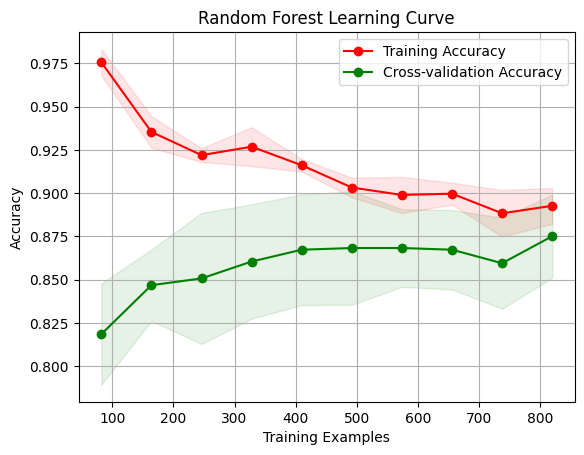

In [ ]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Accuracy')

# Plot the shaded area representing the uncertainty in the scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()

### K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier()

param_kn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'leaf_size': [30, 40, 50]  # Power parameter for the Minkowski metric
}

# Create a GridSearchCV object with the KNN classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_kn, cv=5)

grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'leaf_size': 30, 'n_neighbors': 3}


In [ ]:
best_knn = KNeighborsClassifier(leaf_size=30, n_neighbors=3)
best_knn.fit(x_train, y_train)

pred_best_knn = best_knn.predict(x_test)
print(classification_report(y_test, pred_best_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       109
           1       1.00      0.96      0.98        96

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



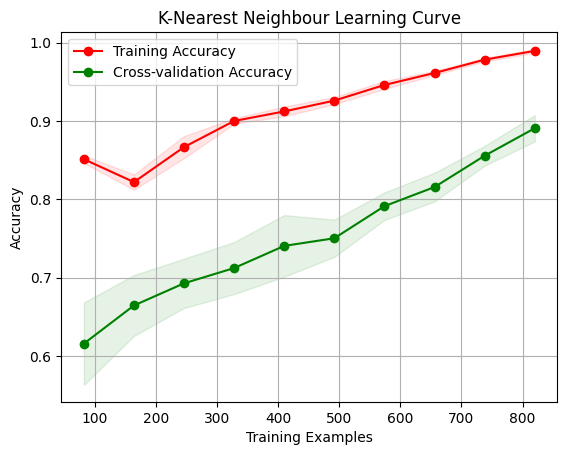

In [ ]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, x, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title('K-Nearest Neighbour Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Accuracy')

# Plot the shaded area representing the uncertainty in the scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()

## ROC Curve

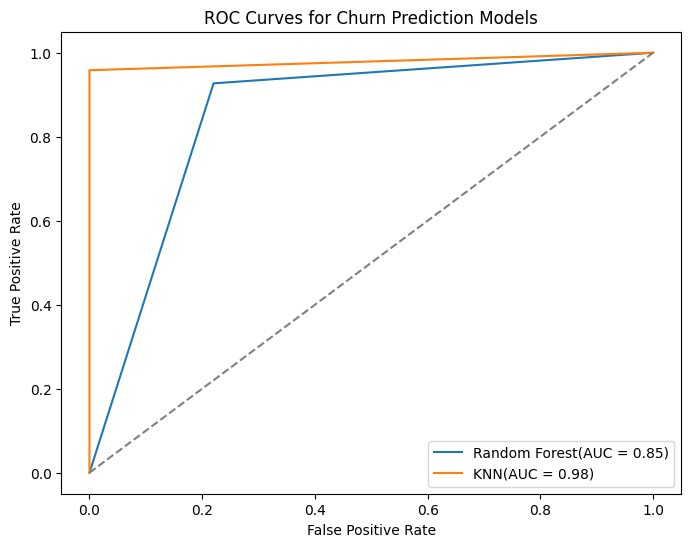

In [ ]:
def plot_roc_curve(y_test, preds, name):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curve for each model
    i = 0
    for pred in preds:
        fpr, tpr, _ = roc_curve(y_test, pred)
        auc_score = roc_auc_score(y_test, pred)
        plt.plot(fpr, tpr, label=f'{name[i]}(AUC = {auc_score:.2f})')
        i+=1

    # Plot random guess
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Churn Prediction Models')
    plt.legend()
    plt.show()

preds = [pred_best_rf, pred_best_knn]
name = ['Random Forest', 'KNN']

plot_roc_curve(y_test, preds, name)

# Automate EDA

In [ ]:
# With Pandas Profiling
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]